##### This analysis is done in python primarily using the pandas library, and jupyter notebook as an interactive interpreter.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30

df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO data file_downloaded.csv", thousands=',', na_values=['-'])
# Getting everything loaded up, and setting up the dataframe.

# Here, I'm making the savings rate into a percentage. This isn't necessary, I just like the formatting.
df['Sav_rate'] = df['Sav_rate']*100 

# All of these are from appendix A in the quality benchmark guideline PDF.
patient_caregiver_columns = ['ACO1','ACO2','ACO3','ACO4','ACO5',
                             'ACO6','ACO7','ACO34']

care_coordination_patient_safety_columns = ['ACO8', 'ACO35', 'ACO36',
                                            'ACO37', 'ACO38', 'ACO43',
                                           'ACO11', 'ACO12', 'ACO13', 'ACO44']

preventative_health_columns = ['ACO14', 'ACO15', 'ACO16', 'ACO17',
                              'ACO18', 'ACO19', 'ACO20', 'ACO42']

at_risk_depression_column = ['ACO40']

at_risk_dm_columns = ['ACO27', 'ACO41', 'DM_Comp']

at_risk_htn_column = ['ACO28']

at_risk_ischemic_vasc_column = ['ACO30']

at_risk_columns = at_risk_depression_column + at_risk_dm_columns + at_risk_htn_column + at_risk_ischemic_vasc_column

# Question #7

#### How could you use these data to effect change in the health of a population? What is some other information you would want to know in order to effectively measure outcomes for a population of patients?

I'm not sure how to use the data just yet. There wasn't any clear change in the savings rate based on whether the hospital was a physician group or a hospital group. Nor was there any significant change in the savings rate based on region. There was mixed messages in the quality metrics based on the organization's track. I don't have a lot that I can use to effect change, yet.

Within the dataset, there are some organizations that are ranked in the top quartile for all 4 quality metrics. Others are ranked in the bottom quartile for all quality metrics. If one were to sum the 4 quartile rankings for each organization, it creates a score between 4 to 16, where 4 = bottom quartile across all four categories, whereas 16 = top quartile across all four categories.

Amongst those that are top performers, what is different about them compared to the lower performers?

Let's take a look at what their patients are doing within their ACO. Meaning, what sort of admissions, and other patient visits are they seeing.

In [8]:
top_bottom_performers_df = df.copy()

top_bottom_performers_df['ACO8'] = 100 - top_bottom_performers_df['ACO8']
top_bottom_performers_df['ACO27'] = 100 - top_bottom_performers_df['ACO27']
top_bottom_performers_df['ACO35'] = 100 - top_bottom_performers_df['ACO35']
top_bottom_performers_df['ACO36'] = 100 - top_bottom_performers_df['ACO36']
top_bottom_performers_df['ACO37'] = 100 - top_bottom_performers_df['ACO37']
top_bottom_performers_df['ACO38'] = 100 - top_bottom_performers_df['ACO38']
top_bottom_performers_df['ACO43'] = 100 - top_bottom_performers_df['ACO43']

# This aggregates the scores for the categories for each organization.
top_bottom_performers_df['patient_caregiver_score'] = top_bottom_performers_df[patient_caregiver_columns].sum(axis=1)
top_bottom_performers_df['care_coordination_score'] = top_bottom_performers_df[care_coordination_patient_safety_columns].sum(axis=1)
top_bottom_performers_df['preventative_health_score'] = top_bottom_performers_df[preventative_health_columns].sum(axis=1)
top_bottom_performers_df['at_risk_score'] = top_bottom_performers_df[at_risk_depression_column + at_risk_dm_columns + at_risk_htn_column + at_risk_ischemic_vasc_column].sum(axis=1)

top_bottom_performers_df['patient_caregiver_quartile'] = pd.qcut(top_bottom_performers_df['patient_caregiver_score'], 4, labels=False) + 1
top_bottom_performers_df['care_coordination_quartile'] = pd.qcut(top_bottom_performers_df['care_coordination_score'], 4, labels=False) + 1
top_bottom_performers_df['preventative_health_quartile'] = pd.qcut(top_bottom_performers_df['preventative_health_score'], 4, labels=False) + 1
top_bottom_performers_df['at_risk_quartile'] = pd.qcut(top_bottom_performers_df['at_risk_score'], 4, labels=False) + 1

top_bottom_performers_df['total_quartile_scores'] = top_bottom_performers_df['patient_caregiver_quartile'] + \
top_bottom_performers_df['care_coordination_quartile'] + top_bottom_performers_df['preventative_health_quartile'] + \
top_bottom_performers_df['at_risk_quartile']

top_bottom_performers_df = top_bottom_performers_df.sort_values(by=['total_quartile_scores'], ascending=False)
top_bottom_performers_df['pcp_beneficiary_ratio'] =  (top_bottom_performers_df['N_PCP'] / top_bottom_performers_df['N_AB']) * 1000
top_bottom_performers_df = top_bottom_performers_df[
    [
        'total_quartile_scores', 'Sav_rate', 'pcp_beneficiary_ratio', 'P_EDV_Vis', 'P_EDV_Vis_HOSP', 'P_EM_PCP_Vis',
        'P_EM_SP_Vis', 'P_EM_Total', 'P_FQHC_RHC_Vis', 'P_Nurse_Vis', 'P_SNF_ADM', 'SNF_LOS',
        'ADM', 'ADM_S_Trm', 'ADM_L_Trm', 'ADM_Rehab', 'ADM_Psych', 'chf_adm', 'copd_adm'
    ]
]

groupby_df = top_bottom_performers_df.groupby('total_quartile_scores').mean().reset_index().sort_values(by='total_quartile_scores', ascending=False).reset_index(drop=True)
groupby_df

,total_quartile_scores,Sav_rate,pcp_beneficiary_ratio,P_EDV_Vis,P_EDV_Vis_HOSP,P_EM_PCP_Vis,P_EM_SP_Vis,P_EM_Total,P_FQHC_RHC_Vis,P_Nurse_Vis,P_SNF_ADM,SNF_LOS,ADM,ADM_S_Trm,ADM_L_Trm,ADM_Rehab,ADM_Psych,chf_adm,copd_adm
0,16,2.689147,5.987298,575.823529,180.058824,4505.294118,4791.529412,10765.470588,148.058824,1320.588235,49.588235,24.058824,266.411765,248.235294,2.000000,9.882353,6.117647,14.058824,6.705882
1,15,3.549291,8.603784,665.147059,212.588235,4509.029412,4739.882353,11098.235294,192.852941,1656.500000,61.088235,24.529412,305.205882,282.617647,1.823529,13.676471,6.705882,16.294118,8.617647
2,14,2.882682,10.887742,671.256410,207.153846,4200.076923,4447.666667,10307.666667,139.384615,1520.538462,61.769231,24.641026,301.102564,277.461538,2.358974,14.153846,6.897436,16.384615,7.923077
3,13,2.475152,12.566967,678.325581,204.069767,4405.604651,4665.023256,10578.255814,127.720930,1380.000000,57.279070,25.348837,300.813953,279.372093,2.697674,12.232558,6.023256,15.558140,8.232558
4,12,1.763749,12.392984,682.107143,203.678571,3964.696429,4563.535714,10178.678571,221.410714,1429.000000,58.607143,24.071429,304.910714,280.910714,2.053571,14.607143,7.303571,16.089286,8.000000
5,11,2.406095,12.716685,725.288136,214.169492,3846.864407,4643.881356,10354.881356,482.559322,1381.627119,59.118644,23.779661,311.322034,286.457627,2.440678,14.135593,7.932203,16.881356,9.118644
6,10,0.954999,11.157809,718.560000,210.660000,3844.100000,4627.100000,10329.120000,498.680000,1359.080000,61.000000,24.920000,309.140000,285.160000,2.860000,14.300000,6.540000,16.540000,9.380000
7,9,1.290644,16.926982,764.711538,216.730769,3728.846154,4534.269231,10158.980769,502.211538,1393.673077,60.326923,24.769231,319.730769,292.903846,2.307692,14.076923,9.961538,16.807692,9.134615
8,8,0.371328,16.636595,715.838710,213.983871,4126.193548,4732.790323,10463.903226,342.177419,1262.790323,59.032258,25.322581,310.064516,285.806452,2.758065,13.467742,7.935484,16.451613,7.903226
9,7,1.478154,18.157411,772.230769,226.288462,3985.211538,4629.557692,10664.711538,596.480769,1453.500000,69.519231,25.980769,330.269231,306.326923,3.173077,12.942308,7.653846,17.326923,8.884615


This dataset represents the average value for each category based on the quartile score ranking.

Now, let's create a visualization for some of this data.

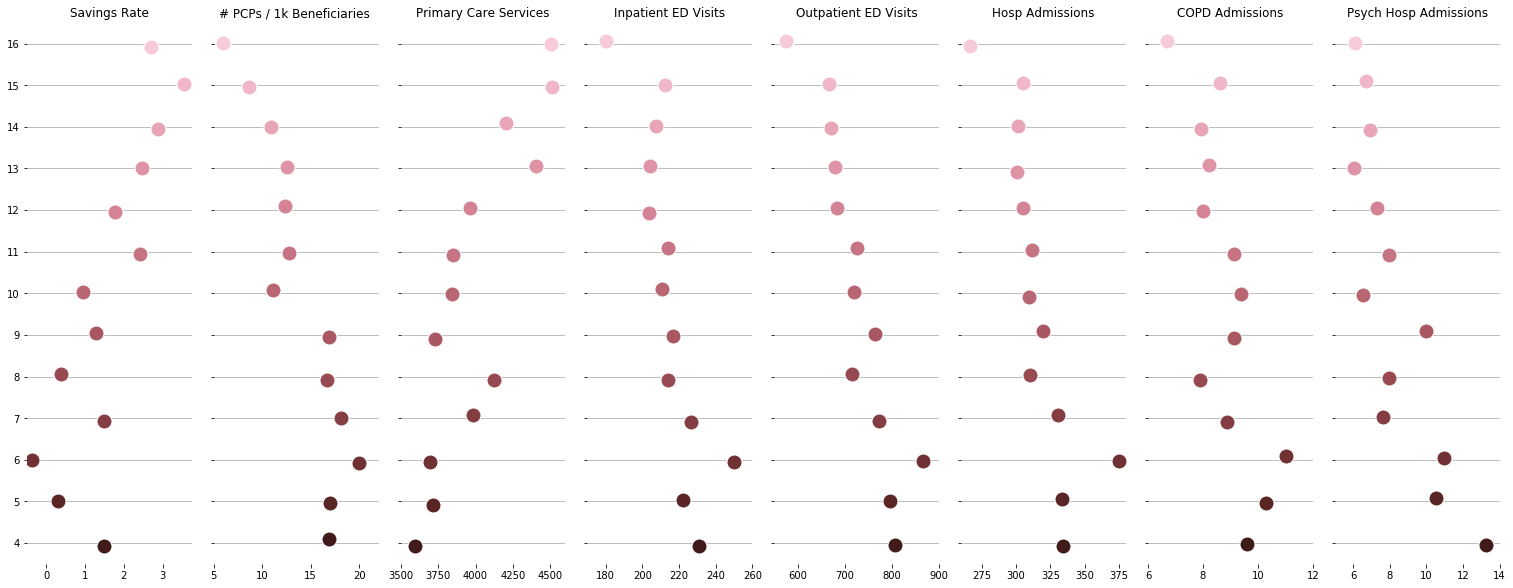

In [9]:
cols_to_plot = ['total_quartile_scores', 'Sav_rate',
    'pcp_beneficiary_ratio', 'P_EDV_Vis', 'P_EDV_Vis_HOSP', 'P_EM_PCP_Vis', 'ADM',
    'ADM_Psych', 'copd_adm'
]

groupby_df = groupby_df[cols_to_plot]

# Renaming the columns to something human readable.
groupby_df.columns = ['Total Quartile Score', 'Savings Rate', 'PCP to Beneficiary Ratio', 'Outpatient ED Visits', 'Inpatient ED Visits','Primary Care Services', 'Hosp Admissions', 'Psych Hosp Admissions', 'COPD Admissions']

# Make the PairGrid
g = sns.PairGrid(
    groupby_df.sort_values("Total Quartile Score", ascending=True),
    x_vars = ['Savings Rate', 'PCP to Beneficiary Ratio', 'Primary Care Services', 'Inpatient ED Visits','Outpatient ED Visits', 'Hosp Admissions', 'COPD Admissions', 'Psych Hosp Admissions'],
    y_vars=["Total Quartile Score"],
    height=8,
    aspect=.33
)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")
g.set(xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Savings Rate', '# PCPs / 1k Beneficiaries ', 'Primary Care Services', 'Inpatient ED Visits','Outpatient ED Visits', 'Hosp Admissions', 'COPD Admissions', 'Psych Hosp Admissions']

# Adjust the x-axes.
axis_tuple = [(-0.5, 3.75), (5, 22), (3500, 4600), (170, 260), (550, 900), (260, 380), (6, 12), (5, 14)]

for ax, title, xlim in zip(g.axes.flat, titles, axis_tuple):
    # Set a different title / xlimit for each axes
    ax.set(xlim=xlim, title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis() # Hack to make it appear in the correct order. Weird matplotlib bug..

The chart above is interesting. It likely won't pass statistical signifiance since the variation is far too large around each point. But, a generalized trend emerges.

- ACO quality ranking seems to correlate with the savings rate. Lower ranked organizations tend to have lower savings rates. Though there doesn't seem to be as much change once an organization enters the bottom half.

 
- ACOs highly ranked for quality (16) have less primary care physicians per beneficiary than those lowest ranked (4). That's the opposite of what is expected. One would think more primary care use would require more primary care physicians.


- Primary Care services are much more highly utilized, and ED visits are less utilized in higher ranking ACOs.


- Admissions for COPD, psychiatric conditions, and total hospital admission are also decreased.


- So the ACOs that are consistently performing well are keeping patients in an outpatient setting, and avoiding hospitalization.

---

HOW they are keeping patients out of the hospital is a question I don't think this dataset can directly answer. I'd be interesting in asking them what they thought their success is derived from. Maybe they have a platform? 

---

As a (recovering) data scientist, I had both a boss that advocated picking up the phone and talking, and another boss that thought insights should come solely from the data. Without a doubt, I think talking is a far better method. Without understanding the underlying processes, one could stare at the data and convince themselves of anything. Whether it's correct... is a different story.

This is probably why AI is so lackluster in healthcare. People try to use our data, but don't take the time to come watch what we do for an extended period of time. They want to solve all of the problems by sitting in front of a laptop and thinking. Physicians have also been thinking for a long time, though. And this is where we've landed. The real insights are likely going to come from strong partnerships between the two, or a physician with dual training, of which the number of us who can code is increasing over time. I'm cautiously optimistic about the use of clinical data driving clinical decisions in a systematic and model based approach.